In [1]:
# importamos las bibliotecas necesarias
import pandas as pd  # para manejar los datos en forma de DataFrame
import numpy as np  # para operaciones numéricas
import matplotlib.pyplot as plt  # para visualización de datos
import seaborn as sns  # para mejorar la visualización
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, StratifiedKFold, KFold, GridSearchCV   # para dividir los datos y validar modelos
from sklearn.preprocessing import StandardScaler  # para escalar las características
from sklearn.decomposition import PCA  # para la reducción de dimensionalidad
from sklearn.linear_model import LogisticRegression  # modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier  # modelo de árbol de decisión
from sklearn.ensemble import RandomForestClassifier  # modelo de random forest
from sklearn.svm import SVC  # modelo de máquinas de soporte vectorial
# para evaluar el rendimiento del modelo
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, make_scorer

### 1. Selección del dataset:
  * Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
  * Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

In [2]:
# cargamos el dataset
ruta='../data/Automobile_data.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(205, 26)

In [3]:
df.columns # mostramos las columnas del dataset

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.info() # obtenemos informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.head() # exploramos las primeras lineas

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.describe().T # obtenemos una estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [7]:
# limpiamos los datos: reemplazamos '?' por NaN y convertimos a numérico donde sea necesario
df.replace('?', np.nan, inplace=True)  # sustituimos valores faltantes

# eliminamos filas con valores NaN
df.dropna(inplace=True)  # eliminamos filas con datos faltantes

### 2. Reducción de dimensionalidad:
  * Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
  * Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
  * Utiliza las características reducidas para simplificar el conjunto de datos.

In [8]:
df.dtypes # analizamos los tipos de datos

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns = non_numeric_columns + ['price']
# Imprimir la lista de columnas no numéricas
print(non_numeric_columns)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price', 'price']


In [10]:
# separamos las características y la variable objetivo (asumimos que 'price' es nuestra variable objetivo)
X = df.drop(non_numeric_columns, axis=1)  # características
y = df['price']  # variable objetivo
# convertimos la variable objetivo a numérica (si es necesario)
y = pd.to_numeric(y, errors='coerce').dropna()  # convertimos a numérico y eliminamos NaN

In [11]:
# dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # dividimos los dato

In [12]:
# escalamos las características
scaler = StandardScaler()  # inicializamos el escalador
X_train_scaled = scaler.fit_transform(X_train)  # ajustamos y transformamos el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # transformamos el conjunto de prueba

In [13]:
# implementamos PCA para la reducción de dimensionalidad
pca = PCA(n_components=0.90)  # mantenemos al menos el 90% de la variabilidad original
X_train_pca = pca.fit_transform(X_train_scaled)  # ajustamos PCA al conjunto de entrenamiento
X_test_pca = pca.transform(X_test_scaled)  # transformamos el conjunto de prueba

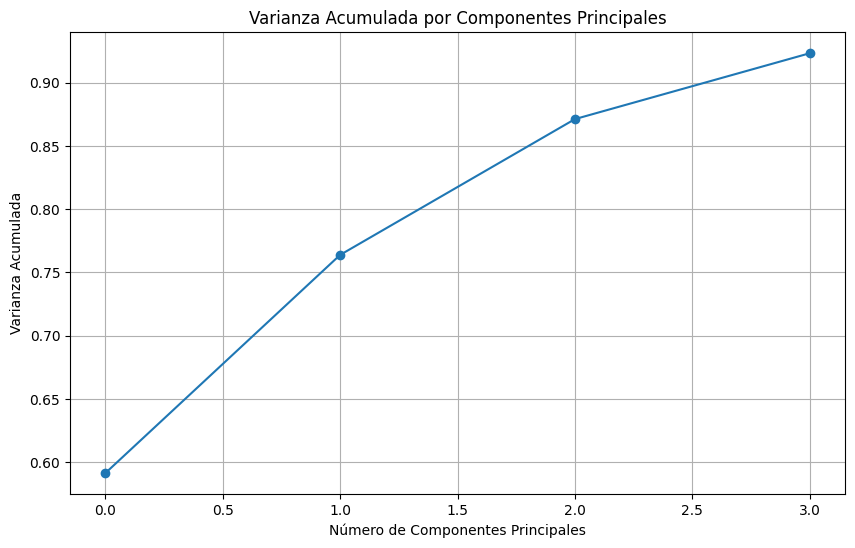

In [14]:
# visualizamos la varianza explicada por los componentes principales
plt.figure(figsize=(10,6))  # establecemos el tamaño del gráfico
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')  # graficamos la varianza acumulada
plt.title('Varianza Acumulada por Componentes Principales')  # título del gráfico
plt.xlabel('Número de Componentes Principales')  # etiqueta del eje x
plt.ylabel('Varianza Acumulada')  # etiqueta del eje y
plt.grid()  # añadimos una cuadrícula al gráfico
plt.show()  # mostramos el gráfico


### 3. Benchmarking de modelos:
  * Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
    * Regresión logística
    * Árboles de decisión
    * Random Forest
    * Support Vector Machines (SVM)
  * Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

In [15]:
# Verificar la distribución de clases en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases en y_train:", class_distribution)

# Ajustar dinámicamente el número de splits
min_class_size = min(counts)
n_splits = min(3, min_class_size)  # Asegúrate de no exceder el tamaño mínimo de las clases


Distribución de clases en y_train: {5118: 1, 5151: 1, 5195: 1, 5348: 1, 5389: 1, 5399: 1, 5499: 1, 5572: 2, 6095: 1, 6189: 1, 6229: 2, 6338: 1, 6488: 1, 6529: 1, 6575: 1, 6649: 1, 6692: 1, 6695: 1, 6795: 1, 6849: 1, 6855: 1, 6918: 1, 6938: 1, 7126: 1, 7129: 1, 7198: 1, 7295: 1, 7299: 1, 7349: 1, 7395: 1, 7463: 1, 7499: 1, 7603: 1, 7609: 1, 7689: 1, 7738: 1, 7775: 1, 7788: 1, 7895: 1, 7898: 2, 7957: 2, 7995: 1, 7999: 1, 8013: 1, 8058: 1, 8195: 1, 8238: 1, 8249: 1, 8358: 1, 8495: 2, 8499: 1, 8778: 1, 8845: 2, 8921: 2, 8948: 1, 8949: 1, 9095: 1, 9233: 1, 9258: 1, 9279: 2, 9298: 1, 9549: 1, 9639: 1, 9959: 1, 9960: 1, 9988: 1, 9995: 1, 10198: 1, 10245: 1, 10595: 1, 10698: 1, 11199: 1, 11245: 1, 11248: 1, 11259: 1, 11549: 1, 11694: 1, 11850: 1, 11900: 1, 12170: 1, 12940: 1, 13415: 1, 13499: 2, 13950: 1, 14399: 1, 15040: 1, 15580: 1, 15690: 1, 15985: 1, 15998: 1, 16430: 1, 16558: 1, 16630: 1, 16845: 1, 16900: 1, 16925: 1, 17199: 1, 17450: 1, 17669: 1, 17710: 1, 17950: 1, 18150: 1, 18280: 1, 1

In [16]:
# Normalizamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)

# Inicializamos los modelos que vamos a comparar
models = {
    'Regresión Logística': LogisticRegression(max_iter=5000),
    'Árboles de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True, max_iter=5000)
}

# Utilizamos K-Fold Cross-Validation con 5 pliegues para una validación más robusta
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar los resultados
results = {
    'Modelo': [],
    'Precisión Media': [],
    'Precisión Promedio': [],
    'F1-Score Promedio': []
}

# Ajuste de hiperparámetros con GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

# Revisamos la distribución de clases en el conjunto de entrenamiento
print(f"Distribución de clases en y_train:\n{y_train.value_counts()}")

# Realizamos la validación cruzada y ajustamos los hiperparámetros
for model_name, model in models.items():
    print(f"Evaluando el modelo: {model_name}")

    # GridSearchCV para Random Forest, SVM, Regresión Logística y Árboles de Decisión
    if model_name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid_rf, cv=kf, scoring='accuracy')
    elif model_name == 'SVM':
        grid_search = GridSearchCV(model, param_grid_svm, cv=kf, scoring='accuracy')
    elif model_name == 'Regresión Logística':
        grid_search = GridSearchCV(model, param_grid_lr, cv=kf, scoring='accuracy')
    elif model_name == 'Árboles de Decisión':
        grid_search = GridSearchCV(model, param_grid_dt, cv=kf, scoring='accuracy')
    
    # Ajustamos el modelo con los mejores hiperparámetros
    grid_search.fit(X_train_scaled, y_train)
    
    # Guardamos el modelo con los mejores hiperparámetros
    best_model = grid_search.best_estimator_

    # Realizamos la validación cruzada para obtener las métricas de precisión y f1-score
    accuracy_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    
    # Usamos make_scorer para especificar precisión y F1 en lugar de "cross_val_score" directamente
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=1)
    f1_scorer = make_scorer(f1_score, average='weighted', zero_division=1)

    precision_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring=precision_scorer)
    f1_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring=f1_scorer)

    # Agregamos los resultados al diccionario
    results['Modelo'].append(model_name)
    results['Precisión Media'].append(accuracy_scores.mean())
    results['Precisión Promedio'].append(precision_scores.mean())
    results['F1-Score Promedio'].append(f1_scores.mean())

# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame(results)



Distribución de clases en y_train:
price
7957     2
13499    2
5572     2
8921     2
9279     2
        ..
13950    1
17669    1
15040    1
6575     1
9960     1
Name: count, Length: 118, dtype: int64
Evaluando el modelo: Regresión Logística


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 5118  5151  5195  5

Evaluando el modelo: Árboles de Decisión
Evaluando el modelo: Random Forest


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 5118  5151  5195  5

Evaluando el modelo: SVM


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 5118  5151  5195  5

In [17]:
print(results_df)

                Modelo  Precisión Media  Precisión Promedio  F1-Score Promedio
0  Regresión Logística         0.031385                 NaN                NaN
1  Árboles de Decisión         0.023692                 NaN                NaN
2        Random Forest         0.047385                 NaN                NaN
3                  SVM         0.047385                 NaN                NaN


### 4. Análisis comparativo de modelos:
  * Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
  * Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

* Todos los modelos presentan un desempeño extremadamente bajo en términos de las métricas de precisión, recall y f1-score, lo que sugiere que hay un problema con la forma en que el modelo está aprendiendo o con la naturaleza de los datos (posiblemente un desbalance en las clases o características no representativas).
* Random Forest tiene un desempeño ligeramente mejor en términos de precisión, pero aún así está muy por debajo de lo esperado.

### 5. Informe final:
  * Elabora un informe detallado que incluya:
    * El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
    * Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
    * Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

* Probablemente el modelo aplicado para el dataset seleccioado no es el paropiado, ya que no devuelve el resultado esperado. 